# Cancer Diagnosis Prediction

Life cycle of the project
- Problem statement
- Data collection
- Data checks
- Exploratory data analysis
- Data preprocessing
- Model training
- Pick the best model

## 1) Problem statement
- This project aims to save the time spent by medical doctors in diagnosing patients for cancer by building a model with high accuracy in predicting a positive diagnosis

## 2) Data collection
- Dataset source - Kaggle
- The dataset has 9 columns and 1,500 rows
- Column descriptions

<img src="data/cancer prediction dataset description.png" alt="Dataset description">

### 2.1 Import the needed libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

### 2.2 Load the dataset

In [2]:
data = pd.read_csv('data/The_Cancer_data_1500_V2.csv')

data.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [15]:
data.shape

(1500, 9)

### 2.3 Column descriptions

<img src="data/cancer prediction dataset description.png" alt="Column descriptions">

## 3) Data checks

Checks:
- missing values
- duplicate rows
- data types
- Categorical columns
- number of unique values of each column
- statistics of the dataset

### 3.1 Missing values

In [3]:
data.isna().sum()

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

### 3.2 Duplicate rows

In [4]:
data.duplicated().sum()

np.int64(0)

Insight: 0 missing and duplicated values

### 3.3 Column data types

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


### 3.4 Categorical columns

In [ ]:
categorical_cols = ['Gender', 'Smoking', 'GeneticRisk', 'CancerHistory', 'Diagnosis']
numerical_cols = [col for col in data.columns if col not in categorical_cols]

print(f'Number of numerical columns: {len(numerical_cols)}')

print(f'Numerical columns: {numerical_cols}')

print(f'\nNumber of categorical columns: {len(categorical_cols)}')

print(f'Categorical columns: {categorical_cols}')

Insight: There are 4 numerical columns and 5 categorical columns

### 3.5 Number of unique values in each column

In [10]:
data.nunique()

Age                   61
Gender                 2
BMI                 1500
Smoking                2
GeneticRisk            3
PhysicalActivity    1500
AlcoholIntake       1500
CancerHistory          2
Diagnosis              2
dtype: int64

Insight:
- The categorical columns are of low cardinality (2 or 3).
- All the numerical columns other than Age have unique values for each data point.

### 3.6 Dataset statistics

In [17]:
data.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


Insight: The columns look well distributed

## 4) EDA

- histogram distribution of features

### 4.1 Histograms

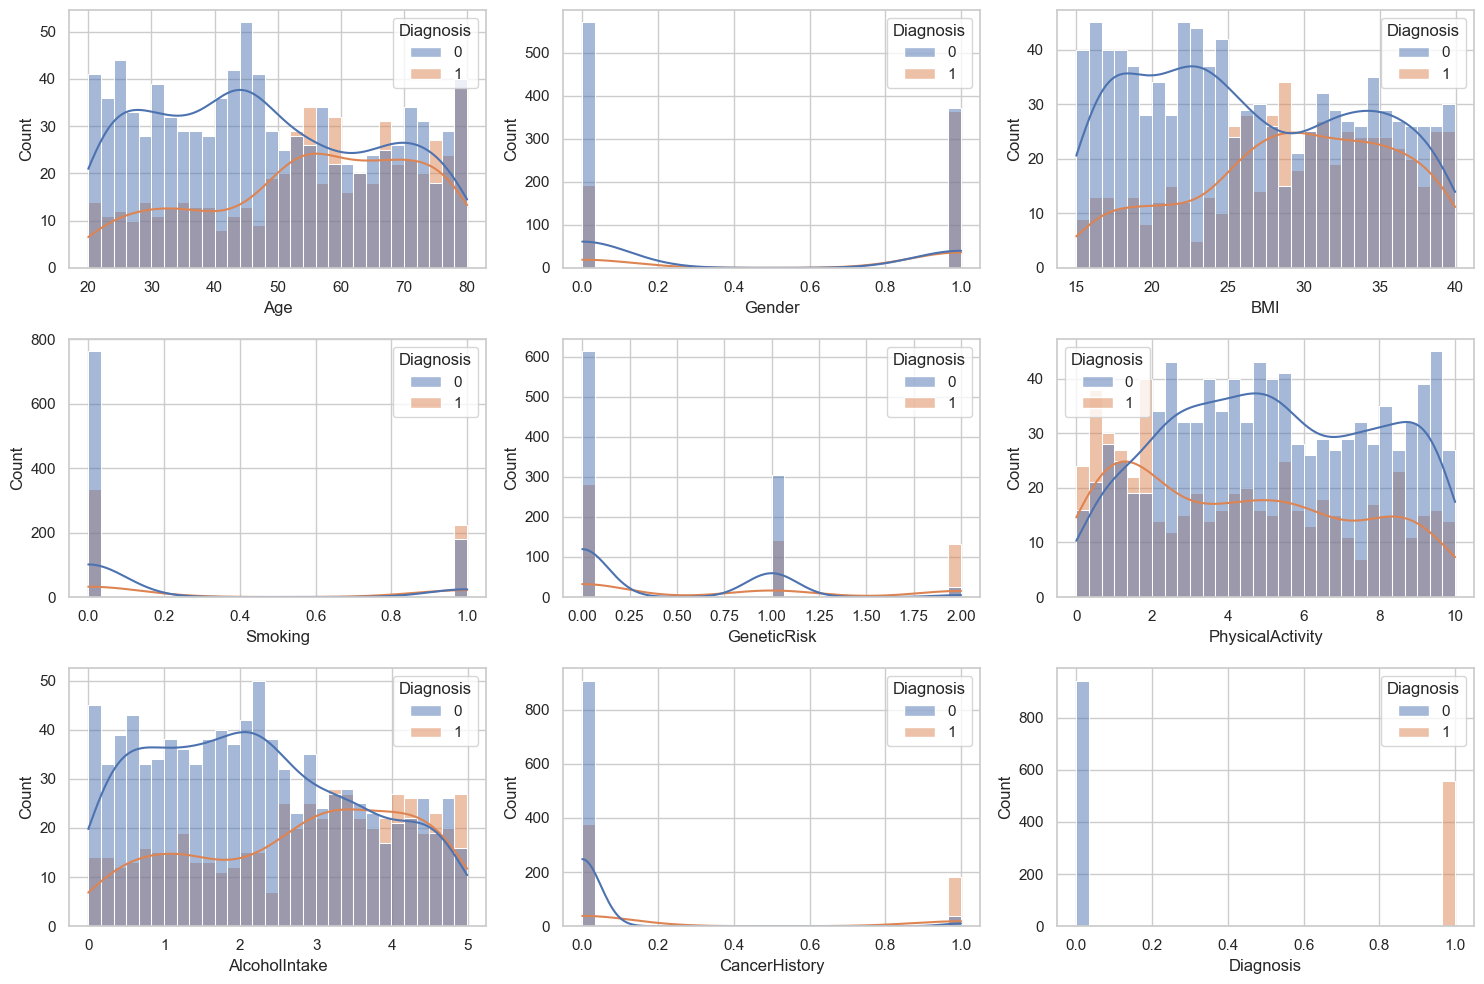

In [53]:
plt.figure(figsize=(15,10))

for i, col in enumerate(data.columns):
    plt.subplot(data.shape[1]//3,3,i+1)
    sns.histplot(data, x=col, bins=30, hue='Diagnosis', kde=True)
plt.tight_layout()
plt.show()

Insight:

Cancer diagnosis was more in people with:
- Age: >50
- Gender: Male
- BMI: >25
- Smoking: 1 (Yes)
- PhysicalActivity: <3
- AlcoholIntage: >2.5
- GeneticRisk: 1 (Yes)

### 4.2 Countplot of target variable

<Axes: xlabel='Diagnosis', ylabel='percent'>

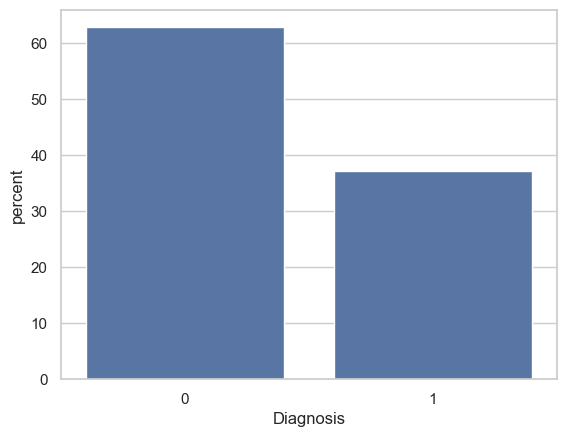

In [31]:
sns.countplot(data, x='Diagnosis', stat='percent')

In [60]:
pos, neg = data.Diagnosis.value_counts(normalize=True)

print(f'Percentage of positive class: {pos*100:.2f}')
print(f'Percentage of negative class: {neg*100:.2f}')

Percentage of positive class: 62.87
Percentage of negative class: 37.13


Insight: The target variable is imbalanced with about 37 negative diagnosis in a random sample of 100 diagnosed persons